In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt


In [2]:
data = pd.read_csv('DrNykterstein.csv')

In [3]:
data.shape

(8686, 634)

In [4]:
data = data[['Date', 'White', 'Black', 'Result', 'WhiteElo', 'BlackElo', 
             'WhiteRatingDiff', 'BlackRatingDiff', 'Variant', 'Opening', 'TimeControl', 'Termination']]



In [5]:
data.head()

,Date,White,Black,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,Variant,Opening,TimeControl,Termination
0,2021.07.03,DrNykterstein,mutdpro,1-0,3098,2801,4,-2,Standard,Sicilian Defense: Accelerated Dragon Modern V...,180+0,Normal
1,2021.07.03,sumsar42,DrNykterstein,1-0,2820,3118,10,-20,Standard,King's Indian Attack: Spassky Variation,180+0,Normal
2,2021.07.03,DrNykterstein,Jasugi99,1-0,3116,2679,2,0,Standard,St. George Defense: Polish Variation,180+0,Normal
3,2021.07.03,Chesstoday,DrNykterstein,1-0,2825,3136,10,-20,Standard,Scotch Game: Classical Variation,180+0,Normal
4,2021.07.03,DrNykterstein,Alexsur81,1-0,3133,2810,3,-2,Standard,King's Indian Attack,180+0,Normal


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8686 entries, 0 to 8685
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             8686 non-null   object
 1   White            8686 non-null   object
 2   Black            8686 non-null   object
 3   Result           8686 non-null   object
 4   WhiteElo         8686 non-null   int64 
 5   BlackElo         8686 non-null   int64 
 6   WhiteRatingDiff  8686 non-null   int64 
 7   BlackRatingDiff  8686 non-null   int64 
 8   Variant          8686 non-null   object
 9   Opening          8686 non-null   object
 10  TimeControl      8686 non-null   object
 11  Termination      8686 non-null   object
dtypes: int64(4), object(8)
memory usage: 814.4+ KB


In [7]:
data.shape

(8686, 12)

In [8]:
data.isna().sum()

Date               0
White              0
Black              0
Result             0
WhiteElo           0
BlackElo           0
WhiteRatingDiff    0
BlackRatingDiff    0
Variant            0
Opening            0
TimeControl        0
Termination        0
dtype: int64

In [9]:
data.isnull().sum()

Date               0
White              0
Black              0
Result             0
WhiteElo           0
BlackElo           0
WhiteRatingDiff    0
BlackRatingDiff    0
Variant            0
Opening            0
TimeControl        0
Termination        0
dtype: int64

In [10]:
# unique values
data.nunique()


Date                188
White               293
Black               307
Result                3
WhiteElo            984
BlackElo            992
WhiteRatingDiff      73
BlackRatingDiff      70
Variant               2
Opening            1027
TimeControl           6
Termination           3
dtype: int64

In [11]:
data['TotalGames'] = data['White'] + data['Black']

In [12]:
data['Result'].value_counts()

1-0        4247
0-1        3736
1/2-1/2     703
Name: Result, dtype: int64

In [13]:
data['Result'].replace(['1-0', '0-1', '1/2-1/2'], ['White wins', 'Black wins', 'Draw'], inplace=True)

In [14]:
#removing draw games
data = data[data['Result'] != 'Draw']

<AxesSubplot:ylabel='Result'>

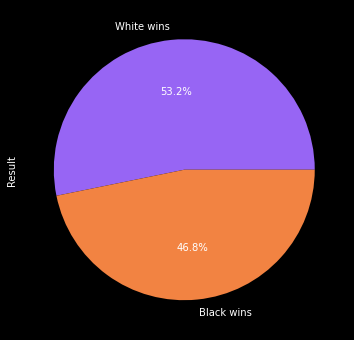

In [15]:
data['Result'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colors=['#9765F4', '#f28342', '#0000ff'])

In [16]:
#removing month and year from date
data['Year'] = data['Date'].str.split('.').str[0]
data['Month'] = data['Date'].str.split('.').str[1]

In [17]:
# removing date column
data.drop(['Date'], axis=1, inplace=True)

<AxesSubplot:>

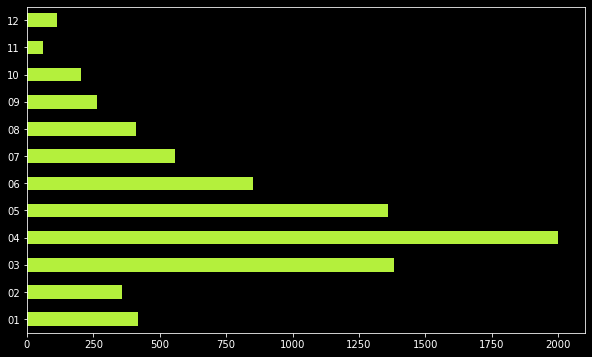

In [18]:
# total number of games played by month
data['Month'].value_counts().sort_index().plot(kind='barh', figsize=(10,6), color='#b4f03c')

<AxesSubplot:>

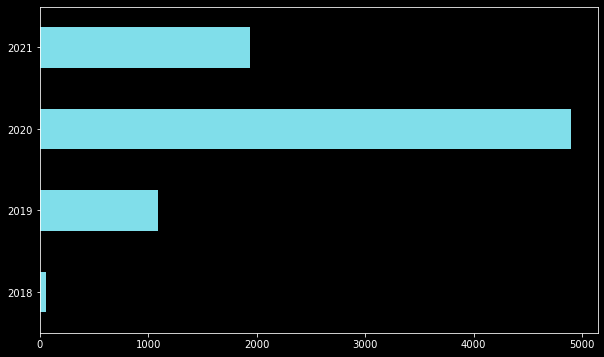

In [19]:
# total number of games played by year
data['Year'].value_counts().sort_index().plot(kind='barh', figsize=(10,6), color='#80DEEA')

In [20]:
data['Termination'].value_counts()

Normal          6808
Time forfeit    1172
Abandoned          3
Name: Termination, dtype: int64

In [21]:
# remove abandoned games
data = data[data['Termination'] != 'Abandoned']

In [22]:
data['TimeControl'].value_counts()

60+0     7578
180+0     162
15+0       90
180+2      86
30+0       51
300+0      13
Name: TimeControl, dtype: int64

In [23]:
data['TimeControl'].replace(['15+0'], 'Rapid (15 min)', inplace=True)
data['TimeControl'].replace(['30+0', '60+0'], 'Classical (60 min)', inplace=True)
data['TimeControl'].replace(['180+0', '180+2', '300+0'], 'Long Classical (180 min)', inplace=True)

In [24]:
data['WhiteElo'] = pd.to_numeric(data['WhiteElo'], errors='coerce')
data['BlackElo'] = pd.to_numeric(data['BlackElo'], errors='coerce')

In [25]:
# replace the range of white and black elo with a single value
data['WhiteElo'].replace(range(900, 1200), 'Begineer', inplace=True)
data['WhiteElo'].replace(range(1201, 1500), 'Ameture', inplace=True)
data['WhiteElo'].replace(range(1501, 1800), 'Intermediate', inplace=True)
data['WhiteElo'].replace(range(1801, 2200), 'Expert', inplace=True)
data['WhiteElo'].replace(range(2201, 2600), 'Master', inplace=True)
data['WhiteElo'].replace(range(2601, 2800), 'International Master', inplace=True)
data['WhiteElo'].replace(range(2801, 3000), 'Grand Master', inplace=True)
data['WhiteElo'].replace(range(3001, 3400), 'Super Grand Master', inplace=True)

data['BlackElo'].replace(range(900, 1200), 'Begineer', inplace=True)
data['BlackElo'].replace(range(1201, 1500), 'Ameture', inplace=True)
data['BlackElo'].replace(range(1501, 1800), 'Intermediate', inplace=True)
data['BlackElo'].replace(range(1801, 2200), 'Expert', inplace=True)
data['BlackElo'].replace(range(2201, 2600), 'Master', inplace=True)
data['BlackElo'].replace(range(2601, 2800), 'International Master', inplace=True)
data['BlackElo'].replace(range(2801, 3000), 'Grand Master', inplace=True)
data['BlackElo'].replace(range(3001, 3400), 'Super Grand Master', inplace=True)


In [26]:
#  removing text after ':' in opening column
data['Opening'].replace(regex=True, inplace=True, to_replace=r':.*', value='')

<AxesSubplot:>

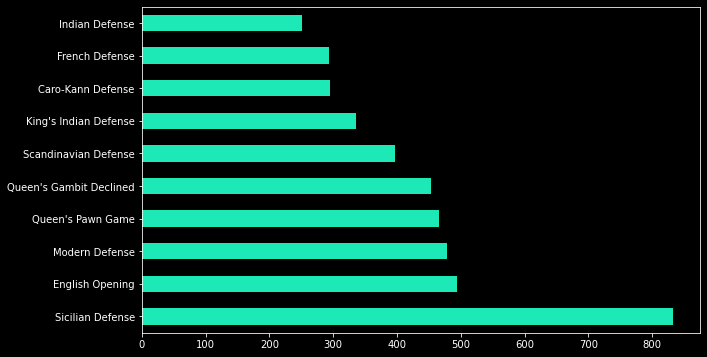

In [27]:
# top 10 openings
data['Opening'].value_counts().head(10).plot(kind='barh', figsize=(10,6), color='#1DE9B6')

In [28]:
data.drop(['TotalGames'] , axis=1, inplace=True)

In [29]:
data['Result'] = data['Result'].replace(['White wins', 'Black wins'], ['1', '0'])

In [30]:
data.head(5)

,White,Black,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,Variant,Opening,TimeControl,Termination,Year,Month
0,DrNykterstein,mutdpro,1,Super Grand Master,Grand Master,4,-2,Standard,Sicilian Defense,Long Classical (180 min),Normal,2021,07
1,sumsar42,DrNykterstein,1,Grand Master,Super Grand Master,10,-20,Standard,King's Indian Attack,Long Classical (180 min),Normal,2021,07
2,DrNykterstein,Jasugi99,1,Super Grand Master,International Master,2,0,Standard,St. George Defense,Long Classical (180 min),Normal,2021,07
3,Chesstoday,DrNykterstein,1,Grand Master,Super Grand Master,10,-20,Standard,Scotch Game,Long Classical (180 min),Normal,2021,07
4,DrNykterstein,Alexsur81,1,Super Grand Master,Grand Master,3,-2,Standard,King's Indian Attack,Long Classical (180 min),Normal,2021,07


In [31]:
# Extract the DrNykterstein info from white and black columns
carlsen = data['White'].astype(str).str.split(' ').str[0]

In [32]:
data

,White,Black,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,Variant,Opening,TimeControl,Termination,Year,Month
0,DrNykterstein,mutdpro,1,Super Grand Master,Grand Master,4,-2,Standard,Sicilian Defense,Long Classical (180 min),Normal,2021,07
1,sumsar42,DrNykterstein,1,Grand Master,Super Grand Master,10,-20,Standard,King's Indian Attack,Long Classical (180 min),Normal,2021,07
2,DrNykterstein,Jasugi99,1,Super Grand Master,International Master,2,0,Standard,St. George Defense,Long Classical (180 min),Normal,2021,07
3,Chesstoday,DrNykterstein,1,Grand Master,Super Grand Master,10,-20,Standard,Scotch Game,Long Classical (180 min),Normal,2021,07
4,DrNykterstein,Alexsur81,1,Super Grand Master,Grand Master,3,-2,Standard,King's Indian Attack,Long Classical (180 min),Normal,2021,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,Inventing_Invention,DrNykterstein,0,International Master,Master,-15,52,Standard,Zukertort Opening,Classical (60 min),Normal,2018,12
8682,DrNykterstein,Chalalpa,1,Master,Master,23,-6,Standard,Indian Defense,Classical (60 min),Normal,2018,12
8683,fuglfonix,DrNykterstein,0,Expert,Master,-3,8,Standard,Blackmar-Diemer Gambit,Classical (60 min),Normal,2018,12
8684,DrNykterstein,TimeToShine,1,Master,Master,31,-7,Standard,English Opening,Classical (60 min),Normal,2018,12


In [56]:
# if white is DrNykterstein, and result is 1, then winner is white
data['Result'] = np.where(np.where(data['White'] == 'DrNykterstein', data['Result'] == '1', True), 'Lost', 'Won')

In [57]:
data

,White,Black,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,Variant,Opening,TimeControl,Termination,Year,Month
0,DrNykterstein,Player1,Won,Super Grand Master,Grand Master,4,-2,Standard,1,Long Classical (180 min),Normal,2021,07
1,Player1,DrNykterstein,Lost,Grand Master,Super Grand Master,10,-20,Standard,11,Long Classical (180 min),Normal,2021,07
2,DrNykterstein,Player1,Won,Super Grand Master,International Master,2,0,Standard,11,Long Classical (180 min),Normal,2021,07
3,Player1,DrNykterstein,Lost,Grand Master,Super Grand Master,10,-20,Standard,11,Long Classical (180 min),Normal,2021,07
4,DrNykterstein,Player1,Won,Super Grand Master,Grand Master,3,-2,Standard,11,Long Classical (180 min),Normal,2021,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,Player1,DrNykterstein,Lost,International Master,Master,-15,52,Standard,11,Classical (60 min),Normal,2018,12
8682,DrNykterstein,Player1,Won,Master,Master,23,-6,Standard,10,Classical (60 min),Normal,2018,12
8683,Player1,DrNykterstein,Lost,Expert,Master,-3,8,Standard,11,Classical (60 min),Normal,2018,12
8684,DrNykterstein,Player1,Won,Master,Master,31,-7,Standard,2,Classical (60 min),Normal,2018,12


In [58]:
# number of games won by DrNykterstein as white
DrNykterstein_won = np.count_nonzero(np.where(np.where(data['White'] == 'DrNykterstein', data['Result'] == '1', True), '0', '1') == '1')
# number of games lost by DrNykterstein as white
DrNykterstein_lost = np.count_nonzero(np.where(np.where(data['White'] == 'DrNykterstein', data['Result'] == '1', True), '0', '1') == '0')

In [59]:
Final_result = pd.DataFrame({'Player': ['DrNykterstein'], 'Win': [DrNykterstein_won], 'Loss': [DrNykterstein_lost]})

In [60]:
win_ratio = round(DrNykterstein_won / (DrNykterstein_won + DrNykterstein_lost) * 100, 2)
print('Win ratio of DrNykterstein is', win_ratio, '%')

loss_ratio = round(DrNykterstein_lost / (DrNykterstein_won + DrNykterstein_lost) * 100, 2)
print('Loss ratio of DrNykterstein is', loss_ratio, '%')

Win ratio of DrNykterstein is 50.76 %
Loss ratio of DrNykterstein is 49.24 %


In [61]:
Final_result

,Player,Win,Loss
0,DrNykterstein,4051,3929


In [62]:
data['Result'] = data['Result'].replace(['1', '0'], ['Won', 'Lost'])

In [63]:
# replace the name of all players except DrNykterstein with 'DrNykterstein'
data['White'] = np.where(data['White'] != 'DrNykterstein', 'Player1', data['White'])
data['Black'] = np.where(data['Black'] != 'DrNykterstein', 'Player1', data['Black'])


In [64]:
data

,White,Black,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,Variant,Opening,TimeControl,Termination,Year,Month
0,DrNykterstein,Player1,Won,Super Grand Master,Grand Master,4,-2,Standard,1,Long Classical (180 min),Normal,2021,07
1,Player1,DrNykterstein,Lost,Grand Master,Super Grand Master,10,-20,Standard,11,Long Classical (180 min),Normal,2021,07
2,DrNykterstein,Player1,Won,Super Grand Master,International Master,2,0,Standard,11,Long Classical (180 min),Normal,2021,07
3,Player1,DrNykterstein,Lost,Grand Master,Super Grand Master,10,-20,Standard,11,Long Classical (180 min),Normal,2021,07
4,DrNykterstein,Player1,Won,Super Grand Master,Grand Master,3,-2,Standard,11,Long Classical (180 min),Normal,2021,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,Player1,DrNykterstein,Lost,International Master,Master,-15,52,Standard,11,Classical (60 min),Normal,2018,12
8682,DrNykterstein,Player1,Won,Master,Master,23,-6,Standard,10,Classical (60 min),Normal,2018,12
8683,Player1,DrNykterstein,Lost,Expert,Master,-3,8,Standard,11,Classical (60 min),Normal,2018,12
8684,DrNykterstein,Player1,Won,Master,Master,31,-7,Standard,2,Classical (60 min),Normal,2018,12


In [65]:
data['Opening'].value_counts().head(10)

11    3684
1      833
2      494
3      478
4      466
5      454
6      397
7      335
8      295
9      293
Name: Opening, dtype: int64

In [43]:
# replace the name of all openings with numbers
opening_keep = ['Sicilian Defense', 'English Opening', 'Modern Defense', 
                "Queen's Pawn Game", "Queen's Gambit Declined", 
                'Scandinavian Defense', "King's Indian Defense", 
                'Caro-Kann Defense', 'French Defense', 'Indian Defense']



In [44]:
# changing the name of the openings to others except the ones in the list
data['Opening'] = np.where(data['Opening'].isin(opening_keep), data['Opening'], 'Others')

In [45]:
data['Opening'].replace(['Sicilian Defense', 'English Opening', 'Modern Defense', 
                "Queen's Pawn Game", "Queen's Gambit Declined", 
                'Scandinavian Defense', "King's Indian Defense", 
                'Caro-Kann Defense', 'French Defense', 'Indian Defense', 'Others'], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], inplace=True)

<AxesSubplot:ylabel='Opening,White'>

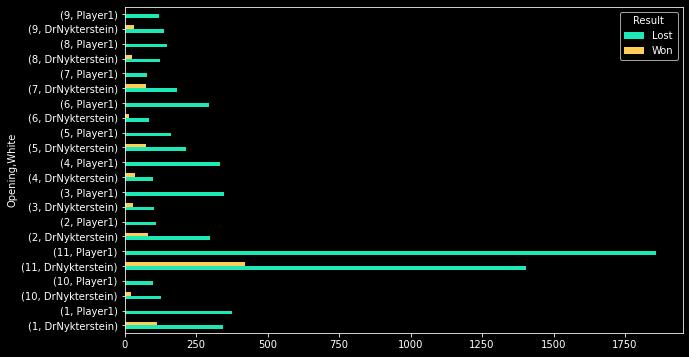

In [46]:
# number of games played by DrNykterstein by opening plot
data.groupby(['Opening', 'White'])['Result'].value_counts().unstack().sort_index().plot(kind='barh', figsize=(10,6), color=['#1DE9B6', '#FFCE56', '#FF6B6B', '#1DE9B6', '#FFCE56', '#FF6B6B', '#1DE9B6', '#FFCE56', '#FF6B6B', '#1DE9B6', '#FFCE56', '#FF6B6B'])

In [66]:
data['Result'] = data['Result'].replace(['Won', 'Lost'], ['1', '0'])

In [68]:
#data['TimeControl'] = data['TimeControl'].replace(['Rapid (15 min)', 'Classical (60 min)', 'Long Classical (180 min)'], ['30', '60', '180'], inplace=True)

In [70]:
data['Termination'].replace(['Normal', 'Time forfeit'], ['1', '0'], inplace=True)

In [75]:
data['Variant'].replace(['Standard', 'Atomic'], ['1', '2'], inplace=True)

In [77]:
data['Year'].replace(['2018', '2019', '2020', '2021'], ['18', '19', '20', '21'], inplace=True)

In [79]:
# converting the year column to int data type
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(str)

In [98]:
# numerical columns and categorical columns
numerical_columns = ['Year', 'Month', 'White', 'Black', 'WhiteRatingDiff', 'BlackRatingDiff', 'Termination', 'Variant', 'Opening']
categorical_columns = ['Result']

In [105]:
data[numerical_columns].head(5)

,Year,Month,White,Black,WhiteRatingDiff,BlackRatingDiff,Termination,Variant,Opening
0,3,6,0,1,35,28,1,0,0
1,3,6,1,0,41,10,1,0,2
2,3,6,0,1,33,30,1,0,2
3,3,6,1,0,41,10,1,0,2
4,3,6,0,1,34,28,1,0,2


In [100]:
data[categorical_columns].head(5)

,Result
0,1
1,0
2,1
3,0
4,1


In [102]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['White'] = encoder.fit_transform(data['White']) 

In [103]:
data['Black'] = encoder.fit_transform(data['Black']) 

In [104]:
data['Year'] = encoder.fit_transform(data['Year']) 
data['Month'] = encoder.fit_transform(data['Month']) 
data['WhiteRatingDiff'] = encoder.fit_transform(data['WhiteRatingDiff']) 
data['BlackRatingDiff'] = encoder.fit_transform(data['BlackRatingDiff']) 
data['Variant'] = encoder.fit_transform(data['Variant']) 
data['Opening'] = encoder.fit_transform(data['Opening']) 


In [106]:
data['Termination'] = encoder.fit_transform(data['Termination'])

In [107]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[numerical_columns], data[categorical_columns], test_size=0.3, random_state=42)

In [111]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [112]:
# accuracy of the model
accuracy = clf.score(X_test, y_test)
accuracy

1.0

In [115]:
# predicting the result of the test data vs the actual result
predicted = clf.predict(X_test)
print(predicted, y_test)

[1 1 1 ... 1 0 1]       Result
3100       1
2722       1
7760       1
6400       0
8471       1
...      ...
1079       0
7375       1
3067       1
7660       0
1403       1

[2394 rows x 1 columns]
